# Datetime
- datetime 자료형은 시계열 데이터를 처리하기 위한.. 꼭 필요한 자료형임!

In [ ]:
'2023-02-08' # 문자열로 표현되어 있는 date에서 년, 월, 일 추출.... > datetime으로 하면 손쉽게 가져올 수 있음!

In [1]:
import pandas as pd
pd.to_datetime('2023-02-08').year 

2023

## Python
- 파이썬에서의 데이트타임 자료형!

In [2]:
from datetime import datetime

In [4]:
# datetime(자료형) 만들기
date = datetime(2023,2,8)
date

datetime.datetime(2023, 2, 8, 0, 0)

In [5]:
# 시간 정보 추가하기
date_time = datetime(2023,2,8,10,27,30)
date_time

datetime.datetime(2023, 2, 8, 10, 27, 30)

In [6]:
date.day

8

In [7]:
date_time.hour

10

## Numpy
- numpy에서의 데이트타임 자료형!(우리가 자주 쓸거는 pandas에서의 datetime임!)

In [8]:
import numpy as np
np.array(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'], dtype = 'datetime64')

array(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'],
      dtype='datetime64[D]')

In [9]:
import numpy as np
np.array(['2022/01/01', '2022/02/01'], dtype = 'datetime64')

ValueError: Cannot create a NumPy datetime other than NaT with generic units

In [10]:
import numpy as np
np.array(['20220101', '20220201'], dtype = 'datetime64')

array(['20220101', '20220201'], dtype='datetime64[Y]')

In [11]:
# h -> 시간정보도
np.array(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'], dtype = 'datetime64[h]')

array(['2022-01-01T00', '2022-02-01T00', '2022-03-01T00', '2022-04-01T00'],
      dtype='datetime64[h]')

In [12]:
# Y -> 연도만
np.array(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'], dtype = 'datetime64[Y]')

array(['2022', '2022', '2022', '2022'], dtype='datetime64[Y]')

In [13]:
# np.arange(start, end, step)
np.arange('2023-02-01', '2023-03-01', 7, dtype = 'datetime64[D]')

array(['2023-02-01', '2023-02-08', '2023-02-15', '2023-02-22'],
      dtype='datetime64[D]')

In [14]:
np.arange('2023-02-01', '2030-02-01', dtype = 'datetime64[Y]')

array(['2023', '2024', '2025', '2026', '2027', '2028', '2029'],
      dtype='datetime64[Y]')

In [16]:
np.arange('2023-02-01', '2024-02-01', dtype = 'datetime64[M]')

array(['2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
       '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01'],
      dtype='datetime64[M]')

In [18]:
np.arange('2023-02-01', '2024-02-01', 3, dtype = 'datetime64[M]')

array(['2023-02', '2023-05', '2023-08', '2023-11'], dtype='datetime64[M]')

## Pandas
- 할 수 있는게 좀 더 많아짐

In [21]:
# 데이터를 먼저 만들어보자!
import pandas as pd
dates = pd.date_range('2023/1/28', periods = 7, freq = 'D')
dates

DatetimeIndex(['2023-01-28', '2023-01-29', '2023-01-30', '2023-01-31',
               '2023-02-01', '2023-02-02', '2023-02-03'],
              dtype='datetime64[ns]', freq='D')

In [22]:
dates.day_name()

Index(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'],
      dtype='object')

In [23]:
dates.month_name()

Index(['January', 'January', 'January', 'January', 'February', 'February',
       'February'],
      dtype='object')

In [25]:
dates.weekday # 요일을 숫자로 표현 (0~6, 월요일:0)

Int64Index([5, 6, 0, 1, 2, 3, 4], dtype='int64')

In [26]:
dates.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1], dtype='int64')

In [27]:
dates.days_in_month # 해당 월이 몇일까지 있는지

Int64Index([31, 31, 31, 31, 28, 28, 28], dtype='int64')

In [29]:
dates.is_month_end # 월의 마지막 날짜냐

array([False, False, False,  True, False, False, False])

### to_datetime

In [30]:
# 여러가지 형태들이 datetime형으로 됨!
# 데이터 타입형에서의 NaN값은 NaT로 표현됨
dates = pd.to_datetime(['Jan 01 2023', '1/2/22', '03-Jan-2023', None, '2018-Jan-03', '2023/02/08'])
dates

DatetimeIndex(['2023-01-01', '2022-01-02', '2023-01-03', 'NaT', '2018-01-03',
               '2023-02-08'],
              dtype='datetime64[ns]', freq=None)

### Pandas Datetime

In [34]:
np.random.seed(1004)
data = np.random.randn(3,2)

dates = np.array(['2023-02-01','2023-02-02','2023-02-03'], dtype = 'datetime64[D]')
date_idx = pd.DatetimeIndex(dates) # datetime을 index로 사용하려면 DatetimeIndex로 바꿔줘야 한다.

df = pd.DataFrame(data, index = date_idx, columns = ['v1', 'v2'])
df

,v1,v2
2023-02-01,0.594403,0.402609
2023-02-02,-0.805162,0.115126
2023-02-03,-0.753065,-0.784118


In [35]:
df['month'] = df.index.month # index에 있는 datetime 자료형을 가지고 month만 뽑아낸 값들로 새로운 컬럼을 만듬
df

,v1,v2,month
2023-02-01,0.594403,0.402609,2
2023-02-02,-0.805162,0.115126,2
2023-02-03,-0.753065,-0.784118,2


In [36]:
df.index.max()

Timestamp('2023-02-03 00:00:00')

In [37]:
df.index.min()

Timestamp('2023-02-01 00:00:00')

In [38]:
df.index.argmax() # max의 인덱스, 위치가 나옴!

2

In [39]:
df.index.argmin()

0

In [40]:
df['v1'].idxmin() # 컬럼 v1 기준으로 가장 작은 값의 index

Timestamp('2023-02-02 00:00:00')

In [41]:
df['v2'].idxmax() 

Timestamp('2023-02-01 00:00:00')

### 시계열 특화 함수

In [1]:
!pip install -U finance-datareader

  Using cached finance_datareader-0.9.50-py3-none-any.whl (19 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached lxml-4.9.2-cp39-cp39-win_amd64.whl (3.9 MB)
  Using cached requests_file-1.5.1-py2.py3-none-any.whl (3.7 kB)
  Using cached pandas-1.5.3-cp39-cp39-win_amd64.whl (10.9 MB)
  Using cached numpy-1.24.2-cp39-cp39-win_amd64.whl (14.9 MB)


In [2]:
import FinanceDataReader as fdr
import pandas as pd

df = fdr.DataReader('AAPL', '2018')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943359,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133545,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601856,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447338,82271200


### resample

In [2]:
df.resample(rule = 'Y').mean() # groupby하지 않아도 통계량.. rule기준으로 잘 알 수 있음!

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,47.277859,47.748526,46.795877,47.263357,45.312169,1.360803e+08
2019-12-31,51.967272,52.457927,51.567907,52.063988,50.702360,1.121228e+08
2020-12-31,95.267668,96.661769,93.912796,95.347075,93.916394,1.575646e+08
2021-12-31,140.861866,142.347818,139.474087,140.989365,139.800848,9.052463e+07
2022-12-31,154.802709,156.907809,152.691315,154.835060,154.381919,8.791008e+07
2023-12-31,137.865200,140.357199,136.539201,138.908399,138.908399,7.786262e+07


In [3]:
df.resample(rule = 'Y').last()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.061707,140014000
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.920586,100805600
2020-12-31,134.080002,134.740005,131.720001,132.690002,131.116043,99116600
2021-12-31,178.089996,179.229996,177.259995,177.570007,176.545364,64062300
2022-12-31,128.410004,129.949997,127.430000,129.929993,129.929993,76960600
2023-12-31,150.639999,155.229996,150.639999,154.649994,154.649994,83206400


In [4]:
df.resample(rule = 'Y').max() # 해별로 최고 주가

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,57.695000,58.367500,57.445000,58.017502,55.802376,384986800
2019-12-31,72.779999,73.492500,72.379997,73.412498,71.920586,365248800
2020-12-31,138.050003,138.789993,134.339996,136.690002,135.068588,426510000
2021-12-31,181.119995,182.130005,178.529999,180.330002,179.289444,195432700
2022-12-31,182.630005,182.940002,179.119995,182.009995,180.959747,182602000
2023-12-31,152.570007,157.380005,150.779999,154.649994,154.649994,154279900


In [5]:
df.resample(rule = 'Q').mean() # M, D, ~min 다양! / ys하면 date가 월초로 바뀔거임! 응용 무한 가능!

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-31,43.068402,43.524303,42.654017,43.047828,41.027708,1.509050e+08
2018-06-30,45.301719,45.678125,44.980117,45.349141,43.393046,1.134222e+08
2018-09-30,52.006389,52.473532,51.630238,52.075000,50.014125,1.125703e+08
2018-12-31,48.632659,49.216905,47.816468,48.478016,46.708243,1.682538e+08
2019-03-31,42.335779,42.764181,41.969795,42.415943,41.044952,1.279744e+08
2019-06-30,48.615635,49.139563,48.247698,48.723175,47.326190,1.117964e+08
2019-09-30,52.271328,52.753438,51.826523,52.280195,50.981817,1.060938e+08
2019-12-31,64.142500,64.668281,63.725820,64.332187,62.951038,1.033646e+08
2020-03-31,73.282944,74.693105,72.257581,73.540927,72.144025,1.973181e+08


In [6]:
df.resample(rule = '30min').mean() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02 00:00:00,42.540001,43.075001,42.314999,43.064999,40.950497,102223600.0
2018-01-02 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-02-06 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-06 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-06 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='Date'>

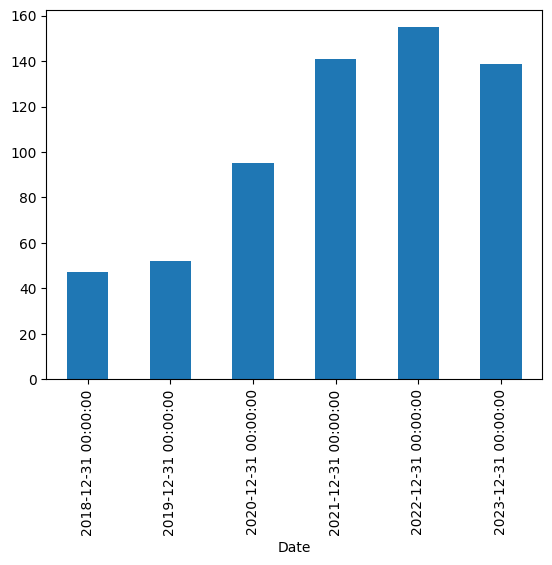

In [7]:
# df.resample(rule = 'Q').mean()

df['Close'].resample('Y').mean().plot.bar() # close에다가 Y(연평균주가) 리샘플해서 뽑고 그래프 그림

<AxesSubplot: xlabel='Date'>

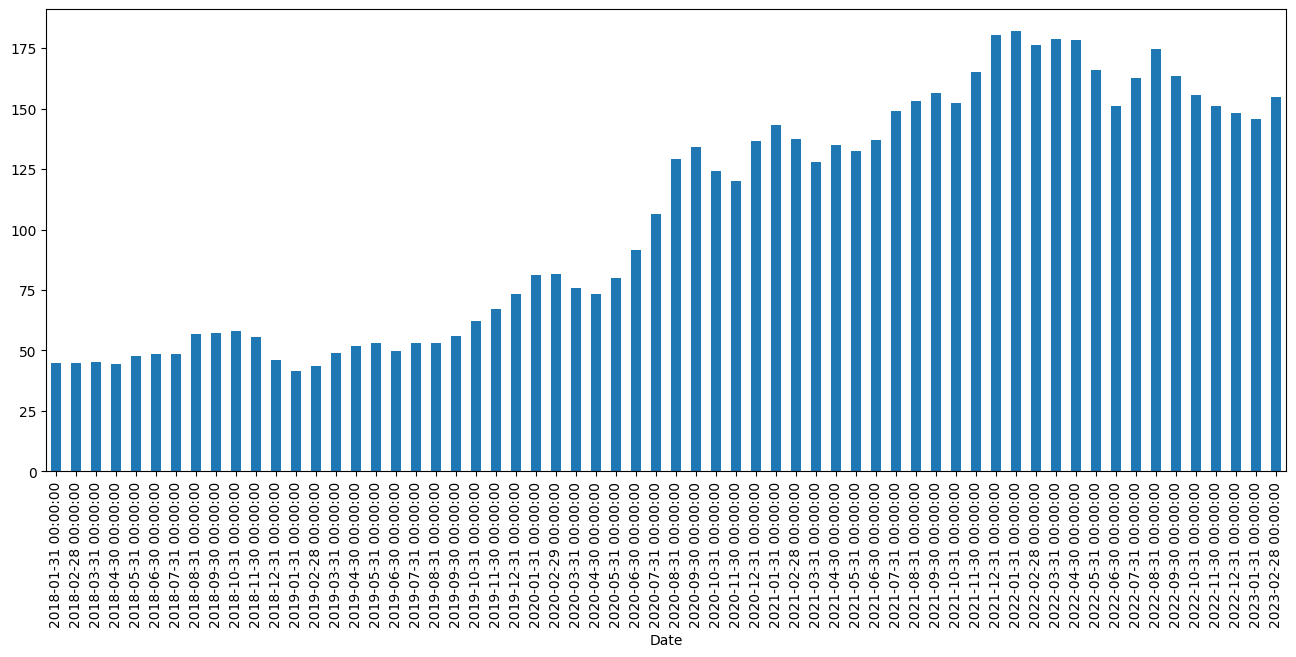

In [8]:
df['Close'].resample('M').max().plot.bar(figsize = (16,6))

### Shift

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943363,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133545,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601856,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447342,82271200


In [ ]:
# 변화율.. 전날과 비교하기 위해서 shift 활용하면 손쉽게 가져올 수 있다(어제 대비 얼마나 올랐냐, 팔렸냐)

In [10]:
df.shift(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,42.540001,43.075001,42.314999,43.064999,40.950497,102223600.0
2018-01-04,43.132500,43.637501,42.990002,43.057499,40.943363,118071600.0
2018-01-05,43.134998,43.367500,43.020000,43.257500,41.133545,89738400.0
2018-01-08,43.360001,43.842499,43.262501,43.750000,41.601856,94640000.0
...,...,...,...,...,...,...
2023-02-01,142.699997,144.339996,142.279999,144.289993,144.289993,65874500.0
2023-02-02,143.970001,146.610001,141.320007,145.429993,145.429993,77663600.0
2023-02-03,148.899994,151.179993,148.169998,150.820007,150.820007,118339000.0


In [11]:
df.shift(-1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,43.132500,43.637501,42.990002,43.057499,40.943363,118071600.0
2018-01-03,43.134998,43.367500,43.020000,43.257500,41.133545,89738400.0
2018-01-04,43.360001,43.842499,43.262501,43.750000,41.601856,94640000.0
2018-01-05,43.587502,43.902500,43.482498,43.587502,41.447342,82271200.0
2018-01-08,43.637501,43.764999,43.352501,43.582500,41.442589,86336000.0
...,...,...,...,...,...,...
2023-02-01,148.899994,151.179993,148.169998,150.820007,150.820007,118339000.0
2023-02-02,148.029999,157.380005,147.830002,154.500000,154.500000,154279900.0
2023-02-03,152.570007,153.100006,150.779999,151.729996,151.729996,69858300.0


In [12]:
df['Yesterday_Close'] = df['Close'].shift(1) # 이렇게 하면 for문으로 하나하나 연산할 필요없음. pandas 는 컬럼 간의 연산 한번에 가능하니까!
df

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close
Date,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,43.064999
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133545,89738400,43.057499
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601856,94640000,43.257500
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447342,82271200,43.750000
...,...,...,...,...,...,...,...
2023-02-01,143.970001,146.610001,141.320007,145.429993,145.429993,77663600,144.289993
2023-02-02,148.899994,151.179993,148.169998,150.820007,150.820007,118339000,145.429993
2023-02-03,148.029999,157.380005,147.830002,154.500000,154.500000,154279900,150.820007


In [13]:
df['diff'] = df['Close'] - df['Yesterday_Close'] # pandas를 쓸 때는 최대한 for문을 덜 쓰도록! 입체적으로 생각하자!
df

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,diff
Date,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,43.064999,-0.007500
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133545,89738400,43.057499,0.200001
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601856,94640000,43.257500,0.492500
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447342,82271200,43.750000,-0.162498
...,...,...,...,...,...,...,...,...
2023-02-01,143.970001,146.610001,141.320007,145.429993,145.429993,77663600,144.289993,1.140000
2023-02-02,148.899994,151.179993,148.169998,150.820007,150.820007,118339000,145.429993,5.390014
2023-02-03,148.029999,157.380005,147.830002,154.500000,154.500000,154279900,150.820007,3.679993


### asfreq
- freq를 바꿔주자!
- resample과 비슷

In [14]:
df.asfreq(freq = '30S') # 우리가 가졌던 데이터는 일 단위였기 때문에 NaN값이 굉장히 많이 생김

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,diff
Date,,,,,,,,
2018-01-02 00:00:00,42.540001,43.075001,42.314999,43.064999,40.950497,102223600.0,NaN,NaN
2018-01-02 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-02-06 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-06 23:58:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-06 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# NaN값 채우는 방법 1) method사용 2) 특정값으로 채워 넣거나!

In [15]:
df.asfreq(freq = '30S', method = 'bfill') # ffill도 있음 # 다음에 나오는 값으로 채워줌..??? 무슨 숫자로 채워줌?

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,diff
Date,,,,,,,,
2018-01-02 00:00:00,42.540001,43.075001,42.314999,43.064999,40.950497,102223600,NaN,NaN
2018-01-02 00:00:30,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,43.064999,-0.007500
2018-01-02 00:01:00,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,43.064999,-0.007500
2018-01-02 00:01:30,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,43.064999,-0.007500
2018-01-02 00:02:00,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,43.064999,-0.007500
...,...,...,...,...,...,...,...,...
2023-02-06 23:58:00,150.639999,155.229996,150.639999,154.649994,154.649994,83206400,151.729996,2.919998
2023-02-06 23:58:30,150.639999,155.229996,150.639999,154.649994,154.649994,83206400,151.729996,2.919998
2023-02-06 23:59:00,150.639999,155.229996,150.639999,154.649994,154.649994,83206400,151.729996,2.919998


In [16]:
df.asfreq(freq = '30S', fill_value = 9.0) # 판다스에서는 이렇게 fill_value로 채우는 경우는 거의 없음 (trend가 중요하기 때문에)

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,diff
Date,,,,,,,,
2018-01-02 00:00:00,42.540001,43.075001,42.314999,43.064999,40.950497,102223600.0,NaN,NaN
2018-01-02 00:00:30,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000
2018-01-02 00:01:00,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000
2018-01-02 00:01:30,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000
2018-01-02 00:02:00,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000
...,...,...,...,...,...,...,...,...
2023-02-06 23:58:00,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000
2023-02-06 23:58:30,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000
2023-02-06 23:59:00,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000


In [17]:
subset = df.loc['2022-11-01':,'Close']
subset.head()

Date
2022-11-01    150.649994
2022-11-02    145.029999
2022-11-03    138.880005
2022-11-04    138.380005
2022-11-07    138.919998
Name: Close, dtype: float64

In [18]:
ffill = subset.asfreq(freq = '3H', method = 'ffill') # 이후에 등장하는 값으로 채워줌
bfill = subset.asfreq(freq = '3H', method = 'bfill') # 이전에 등장하는 값으로 채워줌
interpolate = subset.asfreq(freq = '3H').interpolate() # 통계값...공부하자

In [ ]:
# 시각화
# 어떤 차이가 있는지 좀 더 직관적으로 보자!
# plotly로 line chart 그려볼거임(시간은 line이 웬만하면 좋음) >> 이렇게 무슨 종류 차트만 알면 구글링 하면됨! plotly line chart
# plotly 시각화 하는 방법은 크게 2가지 > 1. 컬럼명 넣기 2. 데이터 넣어주기?

In [ ]:
# # 쥬피터에서 plotly 잘 안될때 이렇게 해보기
# import plotly.offline as pyo
# import plotly.graph_objs as go
# pyo.init_notebook_mode()

# ----------------------------------------------
# jupyter labextension install jupyterlab-plotly

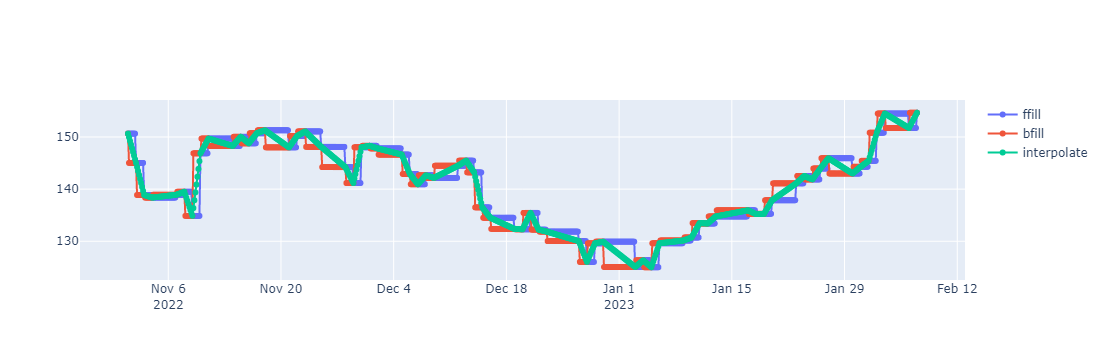

In [21]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=ffill.index, y=ffill.values,
                    mode='lines+markers',
                    name='ffill'))
fig.add_trace(go.Scatter(x=bfill.index, y=bfill.values,
                    mode='lines+markers',
                    name='bfill'))
fig.add_trace(go.Scatter(x=interpolate.index, y=interpolate.values,
                    mode='lines+markers', 
                    name='interpolate'))

fig.show()

### 이동평균
- 이동하면서 평균냈다!
- 누적평균은 ..말그대로 누적해서 평균!
- 이동평균, 누적평균 차이 알기!
- 이동평균 많이 씀!
- 판다스에서 rolling 활용!

### rolling

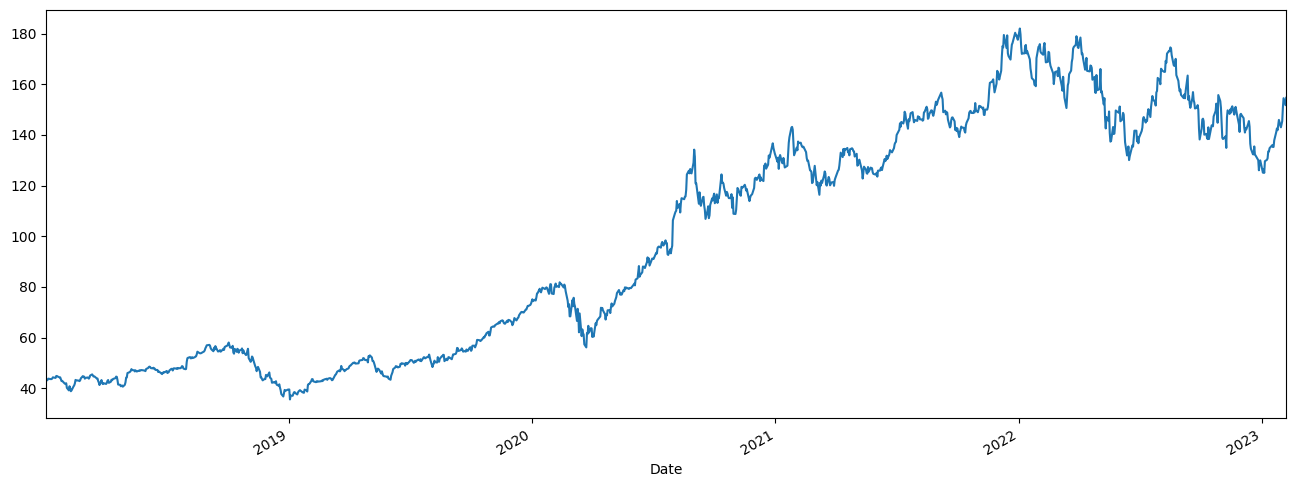

In [22]:
df['Close'].plot(figsize=(16,6)).autoscale(axis = 'x', tight = True) # 좀 더 깔끔하게 딱 맞게 출력됨

<AxesSubplot: xlabel='Date'>

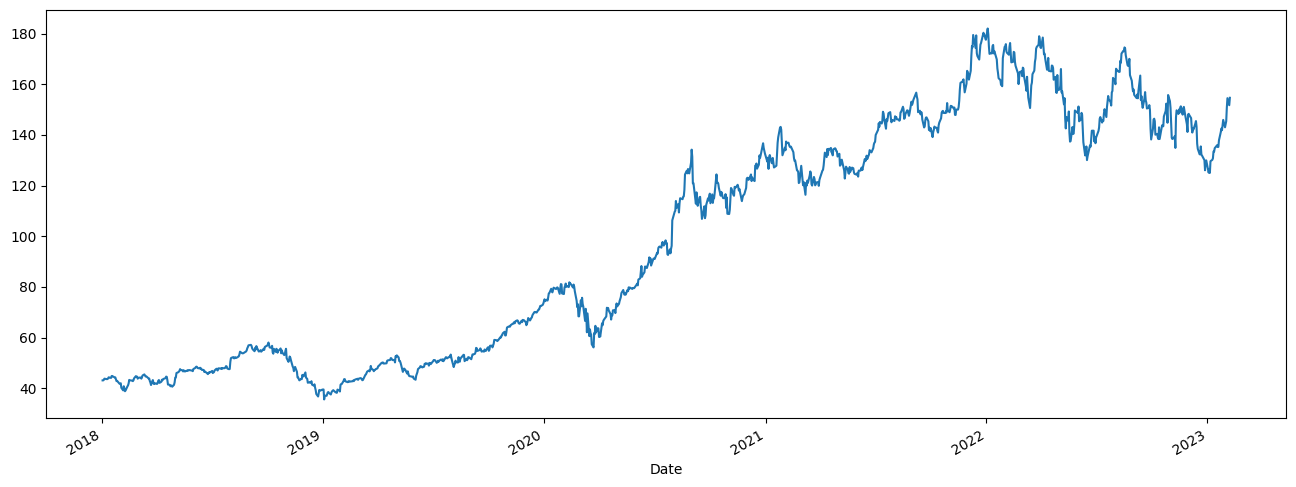

In [23]:
df['Close'].plot(figsize=(16,6))

In [24]:
df.rolling(window = 7).mean().head(15) # 7개 데이터가 최소한 쌓여야 계산이 됨!

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,diff
Date,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-10,43.240358,43.595000,43.096072,43.410357,41.278896,9.558863e+07,NaN,NaN
2018-01-11,43.398572,43.708929,43.282858,43.518214,41.381458,9.165251e+07,43.410357,0.107857
2018-01-12,43.528929,43.809286,43.414643,43.691786,41.546507,8.930977e+07,43.518214,0.173571


In [26]:
df['rolling_7days'] = df['Close'].rolling(7).mean()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,diff,rolling_7days
Date,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600,NaN,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,43.064999,-0.007500,NaN
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133545,89738400,43.057499,0.200001,NaN
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601856,94640000,43.257500,0.492500,NaN
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447342,82271200,43.750000,-0.162498,NaN
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.442589,86336000,43.587502,-0.005002,NaN
2018-01-10,43.290001,43.575001,43.250000,43.572498,41.433079,95839600,43.582500,-0.010002,43.410357
2018-01-11,43.647499,43.872501,43.622501,43.820000,41.668430,74670800,43.572498,0.247502,43.518214
2018-01-12,44.044998,44.340000,43.912498,44.272499,42.098705,101672400,43.820000,0.452499,43.691786


In [27]:
close = df['Close']
rolling_7days = df['rolling_7days']

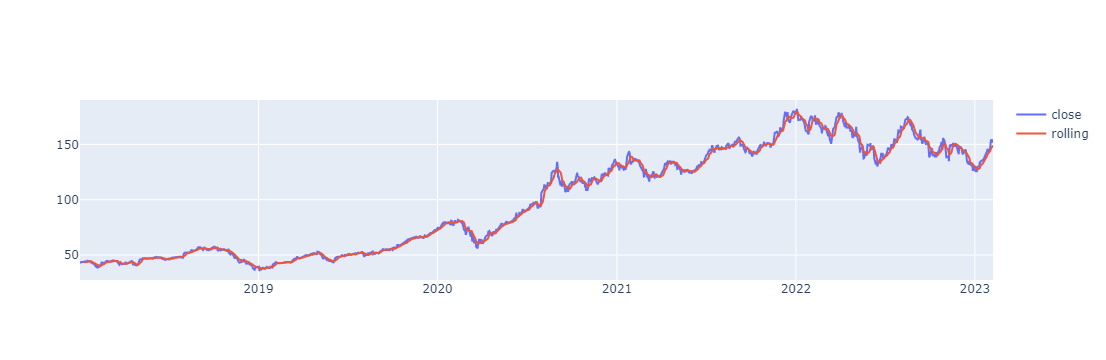

In [34]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=close.index, y=close.values,
                    mode='lines',
                    name='close'))
fig.add_trace(go.Scatter(x=rolling_7days.index, y=rolling_7days.values,
                    mode='lines',
                    name='rolling'))

fig.show()

# 이동평균하니까 그래프 선, 꺾은선이 좀 더 smooth해짐

In [29]:
# 30일 이동평균
df['rolling_30days'] = df['Close'].rolling(30).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,diff,rolling_7days,rolling_30days
Date,,,,,,,,,,
2023-02-01,143.970001,146.610001,141.320007,145.429993,145.429993,77663600,144.289993,1.140000,143.857141,134.694332
2023-02-02,148.899994,151.179993,148.169998,150.820007,150.820007,118339000,145.429993,5.390014,145.041428,135.309333
2023-02-03,148.029999,157.380005,147.830002,154.500000,154.500000,154279900,150.820007,3.679993,146.847142,136.049333
2023-02-06,152.570007,153.100006,150.779999,151.729996,151.729996,69858300,154.500000,-2.770004,147.957140,136.591999
2023-02-07,150.639999,155.229996,150.639999,154.649994,154.649994,83206400,151.729996,2.919998,149.202855,137.339332


In [31]:
rolling_30days = df['rolling_30days']

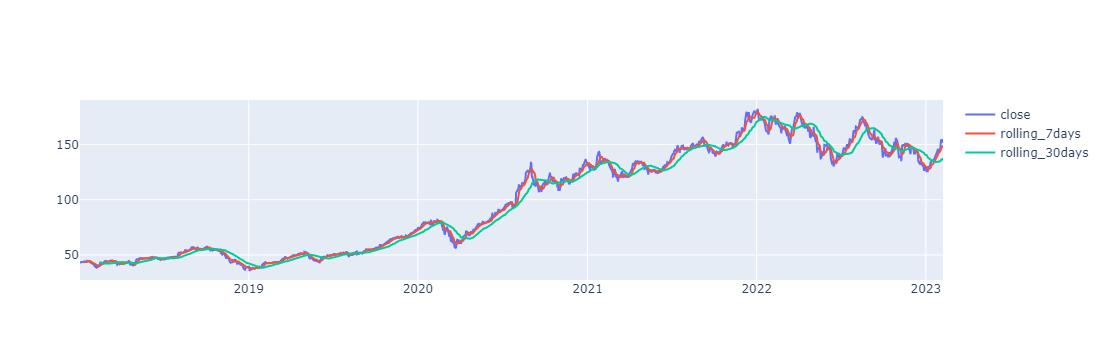

In [33]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=close.index, y=close.values,
                    mode='lines',
                    name='close'))
fig.add_trace(go.Scatter(x=rolling_7days.index, y=rolling_7days.values,
                    mode='lines',
                    name='rolling_7days'))
fig.add_trace(go.Scatter(x=rolling_30days.index, y=rolling_30days.values,
                    mode='lines',
                    name='rolling_30days'))

fig.show()

# 이동평균 시간을 늘리면 늘릴수록 좀 더 smooth해짐!
# 주식에서 이동평균선을 많이 씀
# 빠른선, 느린선..흠.. 갑자기 높은 값 영향...물어보기..뭐가 더 민감?!
# 빠른선, 느린선(7일선, 30일선) >> 빠른선이 느린선을 돌파할때, 느린선이 빠른선을 돌파할때..상승세..하락세.. 이거 좀 더 알아보기!!

### Expanding
- 누적평균

In [36]:
df['Expanding_Close'] = df['Close'].expanding(min_periods = 30).mean() # 최소 30개 모였을 때 누적 평균 하겠다 / 그 전에는 넘 적어!
df.head()

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,diff,rolling_7days,rolling_30days,Expanding_Close
Date,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600,NaN,NaN,NaN,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,43.064999,-0.007500,NaN,NaN,NaN
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133545,89738400,43.057499,0.200001,NaN,NaN,NaN
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601856,94640000,43.257500,0.492500,NaN,NaN,NaN
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447342,82271200,43.750000,-0.162498,NaN,NaN,NaN


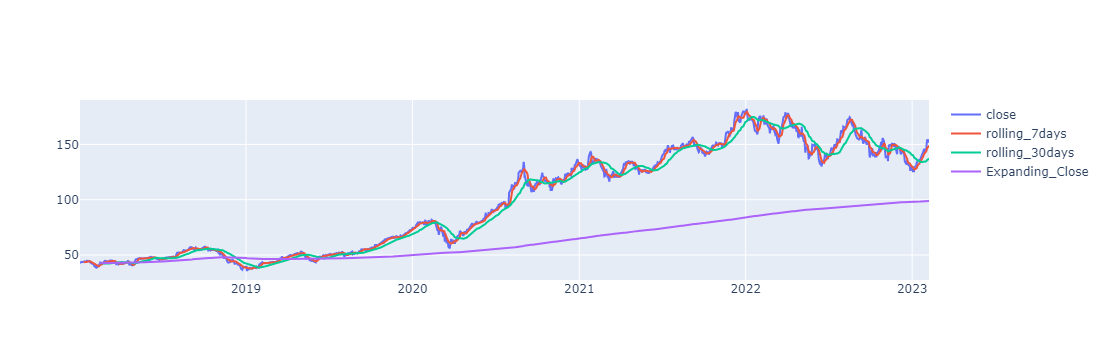

In [37]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=close.index, y=close.values,
                    mode='lines',
                    name='close'))
fig.add_trace(go.Scatter(x=rolling_7days.index, y=rolling_7days.values,
                    mode='lines',
                    name='rolling_7days'))
fig.add_trace(go.Scatter(x=rolling_30days.index, y=rolling_30days.values,
                    mode='lines',
                    name='rolling_30days'))
fig.add_trace(go.Scatter(x=df.index, y=df['Expanding_Close'], # df에서 x,y이렇게 가져오면 됨!!!!!
                    mode='lines',
                    name='Expanding_Close'))

fig.show()

In [38]:
df['diff_expanding'] = df['Close'] - df['Expanding_Close'] # 특정 threshold 정해서 주가 비싸다..안비싸다.. 이런거 지표로 만들어 봐도 좋을듯

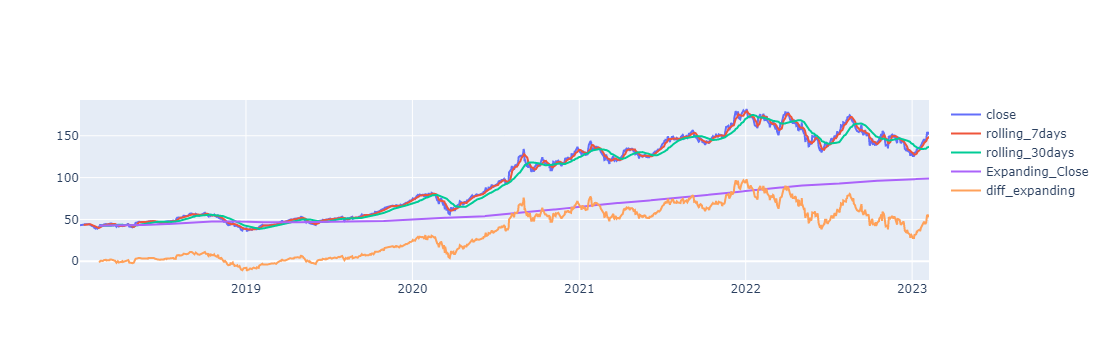

In [39]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=close.index, y=close.values,
                    mode='lines',
                    name='close'))
fig.add_trace(go.Scatter(x=rolling_7days.index, y=rolling_7days.values,
                    mode='lines',
                    name='rolling_7days'))
fig.add_trace(go.Scatter(x=rolling_30days.index, y=rolling_30days.values,
                    mode='lines',
                    name='rolling_30days'))
fig.add_trace(go.Scatter(x=df.index, y=df['Expanding_Close'], 
                    mode='lines',
                    name='Expanding_Close'))
fig.add_trace(go.Scatter(x=df.index, y=df['diff_expanding'], 
                    mode='lines',
                    name='diff_expanding'))

fig.show()

### pct_change
- 변화율
- percentage change

In [40]:
df['pct_change'] = df['Close'].pct_change() # 전날 대비 얼마나 변화했나
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,diff,rolling_7days,rolling_30days,Expanding_Close,diff_expanding,pct_change
Date,,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,43.064999,-0.007500,NaN,NaN,NaN,NaN,-0.000174
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133545,89738400,43.057499,0.200001,NaN,NaN,NaN,NaN,0.004645
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601856,94640000,43.257500,0.492500,NaN,NaN,NaN,NaN,0.011385
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447342,82271200,43.750000,-0.162498,NaN,NaN,NaN,NaN,-0.003714
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.442589,86336000,43.587502,-0.005002,NaN,NaN,NaN,NaN,-0.000115
2018-01-10,43.290001,43.575001,43.250000,43.572498,41.433079,95839600,43.582500,-0.010002,43.410357,NaN,NaN,NaN,-0.000229
2018-01-11,43.647499,43.872501,43.622501,43.820000,41.668430,74670800,43.572498,0.247502,43.518214,NaN,NaN,NaN,0.005680
2018-01-12,44.044998,44.340000,43.912498,44.272499,42.098705,101672400,43.820000,0.452499,43.691786,NaN,NaN,NaN,0.010326


In [41]:
df['pct_change2'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1) # pct_change와 같은 결과
df.head()

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,diff,rolling_7days,rolling_30days,Expanding_Close,diff_expanding,pct_change,pct_change2
Date,,,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,43.064999,-0.007500,NaN,NaN,NaN,NaN,-0.000174,-0.000174
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133545,89738400,43.057499,0.200001,NaN,NaN,NaN,NaN,0.004645,0.004645
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601856,94640000,43.257500,0.492500,NaN,NaN,NaN,NaN,0.011385,0.011385
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447342,82271200,43.750000,-0.162498,NaN,NaN,NaN,NaN,-0.003714,-0.003714


<AxesSubplot: xlabel='Date'>

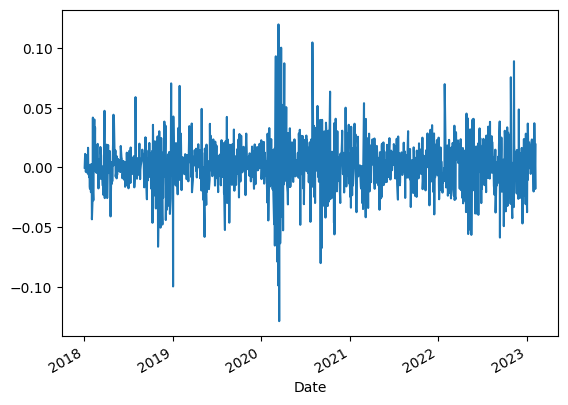

In [42]:
df['pct_change'].plot()

### diff

In [43]:
df['Close_diff'] = df['Close'].diff() # 전거랑 지금거랑 뺀거(변화율은x, 수치적으로)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close,diff,rolling_7days,rolling_30days,Expanding_Close,diff_expanding,pct_change,pct_change2,Close_diff
Date,,,,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950497,102223600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,43.064999,-0.007500,NaN,NaN,NaN,NaN,-0.000174,-0.000174,-0.007500
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133545,89738400,43.057499,0.200001,NaN,NaN,NaN,NaN,0.004645,0.004645,0.200001
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601856,94640000,43.257500,0.492500,NaN,NaN,NaN,NaN,0.011385,0.011385,0.492500
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447342,82271200,43.750000,-0.162498,NaN,NaN,NaN,NaN,-0.003714,-0.003714,-0.162498


<AxesSubplot: xlabel='Date'>

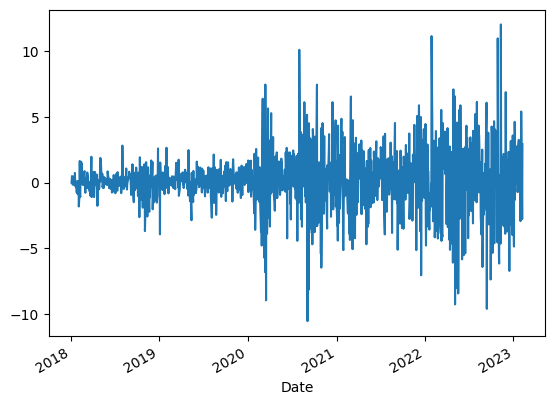

In [44]:
df['Close_diff'].plot()

### reindex
- 서로 다른 데이터들이 존재할때, 가진 데이터의 인덱스가 다를 수 있음(시계열이.. 기간이 다름..) > 근데 이 두 데이터를 함께 활용하고 싶을때! 시계열적으로 인덱스 다시 설정할 수 있는지

In [45]:
samsung = fdr.DataReader('005930', '2018-01-01', '2021-12-31').rename(columns = {'Close':'삼성전자'})
naver = fdr.DataReader('035420', '2019-01-01', '2022-12-31').rename(columns = {'Close':'네이버'})

In [46]:
samsung.head()

,Open,High,Low,삼성전자,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [47]:
naver.head()

,Open,High,Low,네이버,Volume,Change
Date,,,,,,
2019-01-02,121000,122000,117000,118000,356120,-0.032787
2019-01-03,120000,125000,119000,122000,525020,0.033898
2019-01-04,123500,126000,122500,125500,520785,0.028689
2019-01-07,128000,132500,127000,131500,502619,0.047809
2019-01-08,132000,134000,129000,130000,376127,-0.011407


In [48]:
stocks = pd.concat([samsung['삼성전자'], naver['네이버']], axis=1)
stocks.head()

,삼성전자,네이버
Date,,
2018-01-02,51020.0,NaN
2018-01-03,51620.0,NaN
2018-01-04,51080.0,NaN
2018-01-05,52120.0,NaN
2018-01-08,52020.0,NaN


In [49]:
stocks.isnull() # null이니?

,삼성전자,네이버
Date,,
2018-01-02,False,True
2018-01-03,False,True
2018-01-04,False,True
2018-01-05,False,True
2018-01-08,False,True
...,...,...
2022-12-23,True,False
2022-12-26,True,False
2022-12-27,True,False


In [50]:
stocks.isnull().sum() # null 개수

삼성전자    246
네이버     244
dtype: int64

In [51]:
stocks.dropna() # 이렇게 제거하면.. 문제o > 삼성전자, 네이버 데이터 다 날라감 nan이면...  >> 이때 reindex를 쓰면 됨

,삼성전자,네이버
Date,,
2019-01-02,38750.0,118000.0
2019-01-03,37600.0,122000.0
2019-01-04,37450.0,125500.0
2019-01-07,38750.0,131500.0
2019-01-08,38100.0,130000.0
...,...,...
2021-12-24,80500.0,384000.0
2021-12-27,80200.0,380500.0
2021-12-28,80300.0,384500.0


In [52]:
# case1
stocks.reindex(samsung.index) # 삼성전자 인덱스로 다시 설정(naver만 nan인건 날라감) > 삼성전자 인덱스 중요할때

,삼성전자,네이버
Date,,
2018-01-02,51020.0,NaN
2018-01-03,51620.0,NaN
2018-01-04,51080.0,NaN
2018-01-05,52120.0,NaN
2018-01-08,52020.0,NaN
...,...,...
2021-12-24,80500.0,384000.0
2021-12-27,80200.0,380500.0
2021-12-28,80300.0,384500.0


In [54]:
# case2
naver_fri_close = naver['네이버'].resample('W-Fri').last().to_frame() # 금요일 날짜 기준으로 resampling되고(월화수목금..다 합쳐지는데), 해당 주에 가장 마지막 날짜가 나옴..(mean()이면 평균이 나오고!) / to_frame: 시리즈를 df로
naver_fri_close

,네이버
Date,
2019-01-04,125500
2019-01-11,131000
2019-01-18,137500
2019-01-25,130000
2019-02-01,133500
...,...
2022-12-02,185500
2022-12-09,195000
2022-12-16,180500


In [ ]:
# 내가 가지고 있는 데이터가 네이버 금요일 종가 데이터밖에 없는데 삼성것도 이 정보들만 알고 싶을 때

In [55]:
samsung.reindex(naver_fri_close.index)

,Open,High,Low,삼성전자,Volume,Change
Date,,,,,,
2019-01-04,37450.0,37600.0,36850.0,37450.0,14108958.0,-0.003989
2019-01-11,40350.0,40550.0,39950.0,40500.0,11661063.0,0.017588
2019-01-18,42000.0,42400.0,41950.0,42300.0,11029256.0,0.008343
2019-01-25,44300.0,44750.0,43750.0,44750.0,22789395.0,0.039489
2019-02-01,46650.0,46950.0,46250.0,46350.0,13832454.0,0.004334
...,...,...,...,...,...,...
2022-12-02,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-09,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-16,NaN,NaN,NaN,NaN,NaN,NaN


## [실습]

In [56]:
df = fdr.DataReader('005930', '2018') # 다른 주식도 해보기

In [64]:
df

,Open,High,Low,Close,Volume,Change,pct_change,rolling_5days,rolling_20days,rolling_60days
Date,,,,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,NaN,NaN,NaN,NaN
2018-01-03,52540,52560,51420,51620,200270,0.011760,0.011760,NaN,NaN,NaN
2018-01-04,52120,52180,50640,51080,233909,-0.010461,-0.010461,NaN,NaN,NaN
2018-01-05,51300,52120,51200,52120,189623,0.020360,0.020360,NaN,NaN,NaN
2018-01-08,52400,52520,51500,52020,167673,-0.001919,-0.001919,51572.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-02-02,63200,63900,62600,63500,23285983,0.027508,0.027508,62840.0,61260.0,60373.333333
2023-02-03,63900,64000,63000,63800,15194598,0.004724,0.004724,62680.0,61560.0,60406.666667
2023-02-06,62800,63000,61600,61600,15529356,-0.034483,-0.034483,62340.0,61730.0,60400.000000


1. 종가의 변화량을 그래프로 그려보자.

In [59]:
df['pct_change'] = df['Close'].pct_change()
df.head()

,Open,High,Low,Close,Volume,Change,pct_change
Date,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,NaN
2018-01-03,52540,52560,51420,51620,200270,0.011760,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919,-0.001919


<AxesSubplot: xlabel='Date'>

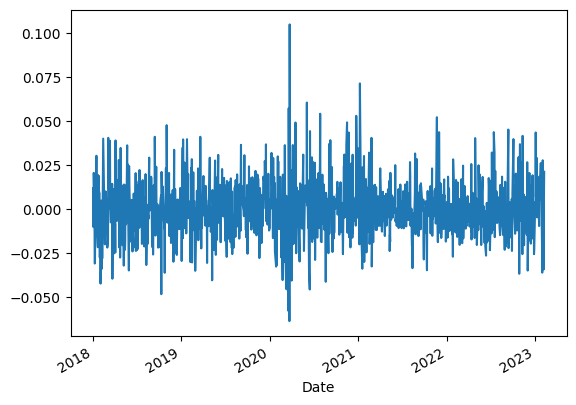

In [60]:
df['pct_change'].plot() # 그냥 df['Close'].pct_change().plot() 해도 됨

2. 이동평균 5일, 이동평균 20일, 이동평균 60일을 종가와 함께 그래프로 그려보자.

In [61]:
df['rolling_5days'] = df['Close'].rolling(5).mean()
df['rolling_20days'] = df['Close'].rolling(20).mean()
df['rolling_60days'] = df['Close'].rolling(60).mean()
df.head()

,Open,High,Low,Close,Volume,Change,pct_change,rolling_5days,rolling_20days,rolling_60days
Date,,,,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,NaN,NaN,NaN,NaN
2018-01-03,52540,52560,51420,51620,200270,0.011760,0.011760,NaN,NaN,NaN
2018-01-04,52120,52180,50640,51080,233909,-0.010461,-0.010461,NaN,NaN,NaN
2018-01-05,51300,52120,51200,52120,189623,0.020360,0.020360,NaN,NaN,NaN
2018-01-08,52400,52520,51500,52020,167673,-0.001919,-0.001919,51572.0,NaN,NaN


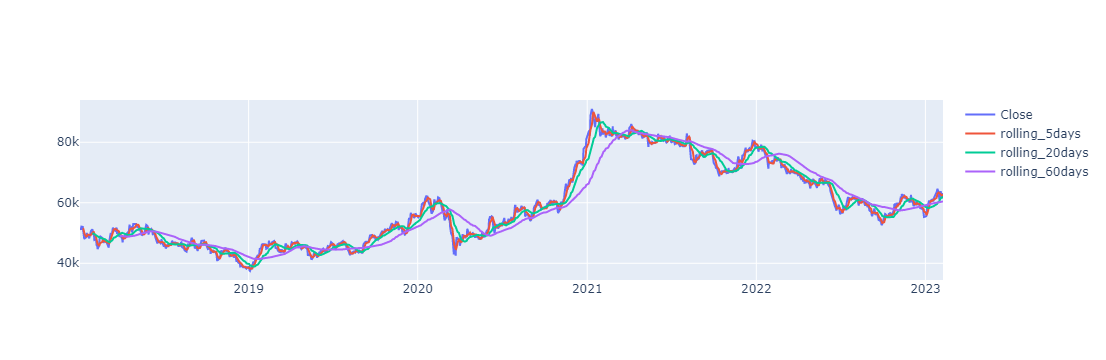

In [62]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Close'],
                    mode='lines',
                    name='Close'))
fig.add_trace(go.Scatter(x=df.index, y=df['rolling_5days'],
                    mode='lines',
                    name='rolling_5days'))
fig.add_trace(go.Scatter(x=df.index, y=df['rolling_20days'],
                    mode='lines',
                    name='rolling_20days'))
fig.add_trace(go.Scatter(x=df.index, y=df['rolling_60days'], 
                    mode='lines',
                    name='rolling_60days'))

fig.show()

3. 종가를 월별 평균 데이터로 리샘플링 한 다음 그래프로 그려보자.

<AxesSubplot: xlabel='Date'>

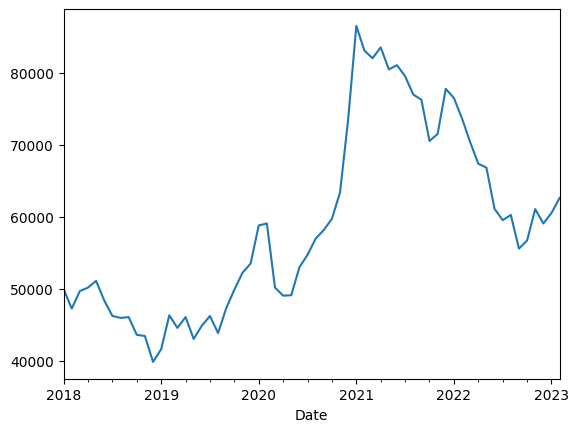

In [66]:
df['Close'].resample(rule = 'M').mean().plot()